# SEIDR model implementation
Authors: Aleksandra Pasternak, Aleksandra Smoter <br>
based on https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

### Imports

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from scipy.interpolate import UnivariateSpline
from scipy.integrate import odeint

### Italy Lombardia case

In [ ]:
# Total population, N.
N0 = 10000000
alpha = 0.006
beta = 0.75
gamma = 1./8
epsilon = 1./3
avg_life_expectancy = 82.8
u = 1/avg_life_expectancy
# lambda - birth rate
L = u*N0
E0 = 20000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0, D0 = 1, 0, 0

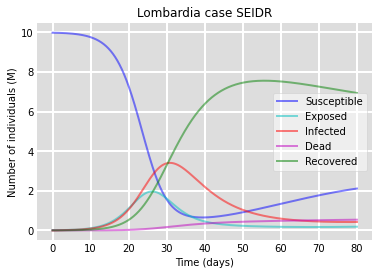

In [2]:
# Everyone else, S0, is susceptible to infection initially.
S0 = N0 - E0 - I0 - R0 - D0
# dt = 0.01
t = np.linspace(0, 80, 8000) 

# The SIR model differential equations.
def deriv(y, t, N, L, beta, gamma, u, epsilon, alpha):
    S, E, I, D, R = y
    dSdt = L - u * S - beta * S * (I / N)
    dEdt = beta * S * (I / N) - (u + epsilon) * E
    dIdt = epsilon * E - (gamma + u + alpha) * I
    dDdt = alpha * I
    dRdt = gamma * I - u * R
    return dSdt, dEdt, dIdt, dDdt, dRdt


# Initial conditions vector
y0 = S0, E0, I0, D0, R0
t = np.linspace(0, 80, 8000) # dt = 0.01
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N0, L, beta, gamma, u, epsilon, alpha))
S, E, I, D, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S / 1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E / 1000000, 'c', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I / 1000000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, D / 1000000, 'm', alpha=0.5, lw=2, label='Dead')
ax.plot(t, R / 1000000, 'g', alpha=0.5, lw=2, label='Recovered')
plt.title('Lombardia case SEIDR')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of individuals (M)')
# ax.set_ylim(0, 1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()

## Poland

In [6]:
df_pl = pd.read_csv('Covid_06-12_2020.csv')

In [10]:
df_pl

,location_id,date,version_name,location_name,inf_mean,inf_upper,inf_lower,seir_cumulative_mean,seir_cumulative_lower,seir_cumulative_upper,inf_cuml_mean,inf_cuml_lower,inf_cuml_upper,seir_daily_mean,seir_daily_lower,seir_daily_upper,seir_daily_unscaled_mean,seir_daily_unscaled_lower,seir_daily_unscaled_upper,seir_cumulative_unscaled_mean,seir_cumulative_unscaled_lower,seir_cumulative_unscaled_upper,reff_mean,reff_lower,reff_upper,cumulative_deaths,daily_deaths,cumulative_cases,cumulative_deaths_unscaled,cumulative_hospitalizations,daily_deaths_unscaled,daily_infections,population,mobility_mean,mobility_obs,testing_mean,testing_lower,testing_upper,testing_obs,pneumonia_mean,pneumonia_obs,mask_use_mean,mask_use_obs,cumulative_all_vaccinated,cumulative_all_fully_vaccinated,cumulative_all_effectively_vaccinated,hospital_beds_mean,hospital_beds_upper,hospital_beds_lower,icu_beds_mean,icu_beds_upper,icu_beds_lower,admis_mean,admis_upper,admis_lower,all_bed_capacity,icu_bed_capacity,infection_fatality,infection_detection,infection_hospitalization
0,1,2020-06-01,reference,Global,5135014.95,6201213.39,4028701.60,687657.79,538797.74,939569.98,2.561245e+08,2.132380e+08,3.074835e+08,11072.84,8207.18,15853.02,5632.25,5631.03,5633.71,447283.88,447243.90,447338.97,NaN,NaN,NaN,693474.28,10412.56,6926352.29,447302.66,679440.41,4858.24,104852.97,7.737465e+09,-32.5561,1,2.323450e+06,2.323450e+06,2.323450e+06,1,0.8695,0,0.6195,1,NaN,NaN,NaN,741564.19,1003701.48,516876.16,146219.40,194185.63,103724.27,51889.53,68402.40,38180.48,17518594,536960,0.0032,0.0271,0.0115
1,1,2020-06-02,reference,Global,5155829.62,6234213.03,4042221.38,698890.13,547116.67,955629.49,2.612803e+08,2.176000e+08,3.134696e+08,11232.33,8280.65,16144.83,5619.74,5618.49,5621.25,452903.63,452862.59,452959.69,NaN,NaN,NaN,704827.75,11353.47,7047516.52,453291.85,685104.63,5989.20,121164.23,7.737465e+09,-31.8592,1,2.346104e+06,2.346104e+06,2.346104e+06,1,0.8673,0,0.6205,1,NaN,NaN,NaN,749695.68,1012821.49,522570.45,148812.50,197224.03,105599.38,52527.93,69409.29,38736.40,17518594,536960,0.0032,0.0271,0.0114
2,1,2020-06-03,reference,Global,5173265.99,6264476.76,4054340.20,710273.12,555507.73,971928.38,2.664536e+08,2.219860e+08,3.194571e+08,11383.00,8347.64,16421.05,5604.87,5603.58,5606.42,458508.49,458466.39,458565.62,NaN,NaN,NaN,716630.33,11802.58,7174069.44,459443.32,690025.53,6151.46,126552.92,7.737465e+09,-31.2254,1,2.368822e+06,2.368822e+06,2.368822e+06,1,0.8662,0,0.6214,1,NaN,NaN,NaN,758340.75,1022401.06,528740.44,151737.55,200788.94,107785.23,53140.45,70481.91,39282.50,17518594,536960,0.0032,0.0271,0.0114
3,1,2020-06-04,reference,Global,5187563.94,6283176.24,4065338.05,721799.80,563967.29,988448.94,2.716412e+08,2.262269e+08,3.254423e+08,11526.68,8411.03,16683.03,5590.71,5589.37,5592.30,464099.20,464056.01,464157.49,NaN,NaN,NaN,728807.99,12177.66,7305519.84,465699.38,694720.10,6256.06,131450.40,7.737465e+09,-30.6558,1,2.391628e+06,2.391628e+06,2.391628e+06,1,0.8652,0,0.6222,1,NaN,NaN,NaN,766136.24,1030613.46,534534.20,153928.58,203327.39,109476.29,53729.95,71556.15,39820.84,17518594,536960,0.0032,0.0270,0.0114
4,1,2020-06-05,reference,Global,5199002.06,6310281.63,4075511.71,733464.82,572494.02,1005177.85,2.768402e+08,2.304233e+08,3.314219e+08,11665.02,8473.22,16932.91,5578.97,5577.59,5580.61,469678.17,469633.92,469737.66,NaN,NaN,NaN,740560.36,11752.38,7441766.65,471363.76,699473.49,5664.38,136246.81,7.737465e+09,-30.1507,1,2.414546e+06,2.414546e+06,2.414546e+06,1,0.8632,0,0.6229,1,NaN,NaN,NaN,774036.16,1038772.56,539880.62,155926.25,205491.80,110790.87,54297.63,72411.28,40351.73,17518594,536960,0.0031,0.0270,0.0114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2,2020-12-27,reference,Poland,54906.94,89226.28,35011.48,43896.10,27235.18,68710.81,8.090040e+06,5.593970e+06,1.246851e+07,42

Populacja na dzień 1 czerwca

In [46]:
N0 = int(df_pl[(df_pl.date == '2020-06-01') & (df_pl.location_name == 'Poland')]['population'])
N0

38434444

In [16]:
life_expectancy_pl = 79.3

In [17]:
u = 1/life_expectancy_pl
u

0.012610340479192938

In [90]:
L = u*N0
L

484671.42496847414

In [89]:
# bon November 3, 2020
REP_0 = 1.25
REP_0

1.25

In [23]:
incubation_period = 5

In [28]:
epsilon = 1/incubation_period
epsilon

0.2

In [26]:
infectious_period = 14

In [29]:
gamma = 1/infectious_period
gamma

0.07142857142857142

In [34]:
last_day_pl = df_pl[(df_pl.date == '2020-12-31') & (df_pl.location_name=='Poland')]
alpha = float(last_day_pl['cumulative_deaths'] / last_day_pl['cumulative_cases'])
alpha

0.03554134057416992

In [ ]:
beta = (alpha+gamma)*R0

In [82]:
I0 = int(df_pl[(df_pl.date == '2020-06-01') & (df_pl.location_name=='Poland')]['daily_infections'])
I0

389

In [41]:
first_day_pl = df_pl[(df_pl.date == '2020-06-01') & (df_pl.location_name=='Poland')]
D0 = int(first_day_pl['cumulative_deaths'])
D0

1731

In [105]:
# according to WHO
R0 = 11400

In [84]:
# multiplied by 5 because of data uncertainity due to testing only facotr of whole population
E0 = int(first_day_pl['testing_mean']) * 5
E0

18148

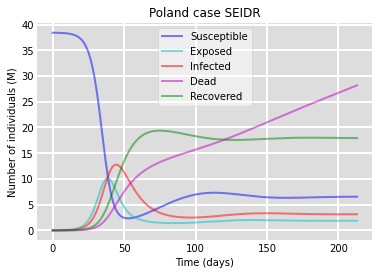

In [109]:
# Everyone else, S0, is susceptible to infection initially.
S0 = N0 - E0 - I0 - R0 - D0
# dt = 0.01
# 1.06 - 31.12
t = np.linspace(0, 213, 21300) 

# The SIR model differential equations.
def deriv(y, t, N, L, beta, gamma, u, epsilon, alpha):
    S, E, I, D, R = y
    dSdt = L - u * S - beta * S * (I / N)
    dEdt = beta * S * (I / N) - (u + epsilon) * E
    dIdt = epsilon * E - (gamma + u + alpha) * I
    dDdt = alpha * I
    dRdt = gamma * I - u * R
    return dSdt, dEdt, dIdt, dDdt, dRdt


# Initial conditions vector
y0 = S0, E0, I0, D0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N0, L, beta, gamma, u, epsilon, alpha))
S, E, I, D, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S / 1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E / 1000000, 'c', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I / 1000000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, D / 1000000, 'm', alpha=0.5, lw=2, label='Dead')
ax.plot(t, R / 1000000, 'g', alpha=0.5, lw=2, label='Recovered')
plt.title('Poland case SEIDR')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of individuals (M)')
# ax.set_ylim(0, 1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()

Problem koncepcyjny:
* parametr Dead zwraca wyniki niezgodne z intuicją i danymi 

Zakładamy (podobnie jak w artykule), że stosunek śmierci niespowodowanych wirusem (u) do tych, które wystąpiły w następstwie zakażenia (alpha) jest bardzo mały : *u<<<alpha*

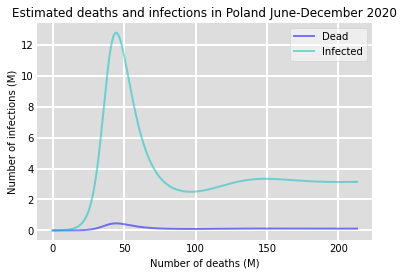

In [108]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
t = np.linspace(0, 213, 21300) 
ax.plot(t, D / 1000000, 'b', alpha=0.5, lw=2, label='Dead')
ax.plot(t, I / 1000000, 'c', alpha=0.5, lw=2, label='Infected')
plt.title('Estimated deaths and infections in Poland June-December 2020')
ax.set_xlabel('Number of deaths (M)')
ax.set_ylabel('Number of infections (M)')
# ax.set_ylim(0, 1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()

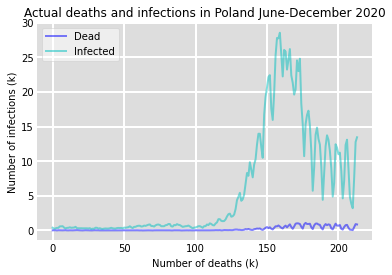

In [103]:
daily_deaths = df_pl[df_pl.location_name=='Poland']['daily_deaths']
daily_infections = df_pl[df_pl.location_name=='Poland']['daily_infections']

t = np.linspace(0, 213, 214) 

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, daily_deaths/1000, 'b', alpha=0.5, lw=2, label='Dead')
ax.plot(t, daily_infections/1000, 'c', alpha=0.5, lw=2, label='Infected')
plt.title('Actual deaths and infections in Poland June-December 2020')
ax.set_xlabel('Number of deaths (k)')
ax.set_ylabel('Number of infections (k)')
# ax.set_ylim(0, 1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()